<a href="https://colab.research.google.com/github/sagarkanta228/Infosys-Springboard/blob/main/Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the State**

In [1]:
from typing import TypedDict, Literal

class State(TypedDict):
    operation: str
    operand_a: float
    operand_b: float
    result: float

**Creating Operational Node**

In [2]:
from langgraph.graph import StateGraph, START, END

def node_add(state: State):
    print("➕ Adding numbers")
    return {"result": state["operand_a"] + state["operand_b"]}

def node_sub(state: State):
    print("➖ Substracting numbers")
    return {"result": state["operand_a"] - state["operand_b"]}

def node_mult(state: State):
    print("✖️ Multiplication numbers")
    return {"result": state["operand_a"] * state["operand_b"]}

def node_div(state: State):
    print("➗ Division numbers")
    if state["operand_b"] == 0:
        raise ValueError("Division by zero")
    return {"result": state["operand_a"] / state["operand_b"]}

**Conditional Operator**

In [3]:
def check_operation(state: State) -> Literal[
    "node_add", "node_sub", "node_mult", "node_div"
]:
    op = state["operation"]

    if op == "add":
        return "node_add"
    elif op == "sub":
        return "node_sub"
    elif op == "mult":
        return "node_mult"
    elif op == "div":
        return "node_div"
    else:
        raise ValueError(f"Unsupported operation: {op}")

In [4]:
builder = StateGraph(State)

nodes = {
    "node_add": node_add,
    "node_sub": node_sub,
    "node_mult": node_mult,
    "node_div": node_div,
}

for name, func in nodes.items():
    builder.add_node(name, func)

builder.add_conditional_edges(START, check_operation)

for name in nodes:
    builder.add_edge(name, END)

graph = builder.compile()

**Data Input**

In [5]:
while True:
    print("\nChoose operation: add, sub, mult, div")
    operation = input("Enter operation (or type 'exit' to quit): ").strip().lower()

    if operation == "exit":
        print("Exiting calculator...")
        break

    try:
        operand_a = float(input("Enter first number: "))
        operand_b = float(input("Enter second number: "))

        result = graph.invoke({
            "operation": operation,
            "operand_a": operand_a,
            "operand_b": operand_b
        })

        print("✅ Result:", result["result"])

    except Exception as e:
        print("❌ Error:", e)


Choose operation: add, sub, mult, div
Enter operation (or type 'exit' to quit): mult
Enter first number: 45.2
Enter second number: 2
✖️ Multiplication numbers
✅ Result: 90.4

Choose operation: add, sub, mult, div
Enter operation (or type 'exit' to quit): exit
Exiting calculator...


**Graphical Visualization**

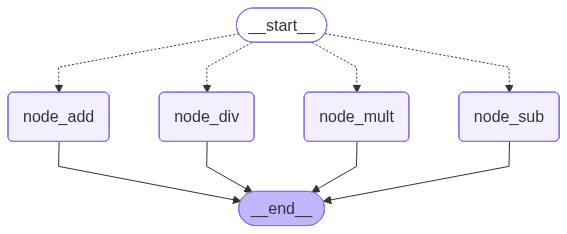

In [6]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(Image(graph.get_graph().draw_mermaid_png()))